In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Read data

In [11]:
ovr = pd.read_excel('results/Kraken2_overlaping_sp.xlsx')
bch = pd.read_excel('input/BGI_samplesheet_27-10-2020-Elinile.xlsx')
mrg = ovr.merge(bch, left_on='sample_name', right_on='SampleID', how='inner')

mrg.tail(2)

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb,SampleID,Plate,Pos,Conc (ng/ul),Vol (ul),Qty (ug),OD260/280,OD260/230,Kommentaar
1988,VY2X73,19.762739,63.278512,16.958749,733,2347,629,VY2X73,MBbgi-21,D2,97.23,15,1.46,1.54,0.74,NaN
1989,VVIEIZ,23.416370,61.494662,15.088968,658,1728,424,VVIEIZ,MBbgi-04,F11,22.33,30,0.67,2.09,0.81,NaN


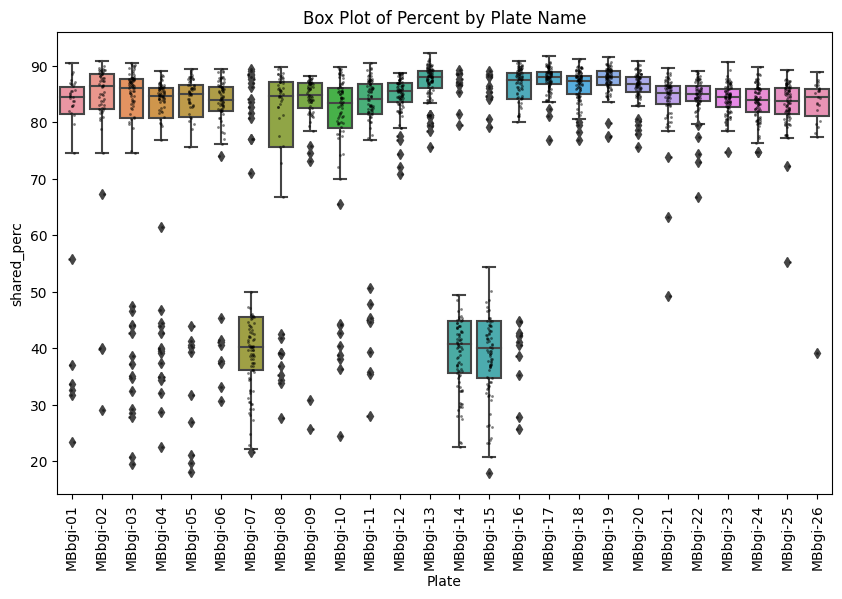

                 sum_sq      df          F         PR(>F)
C(Plate)  362775.699897    25.0  92.866402  2.958353e-310
Residual  306888.803476  1964.0        NaN            NaN


In [22]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# sort data
mrg = mrg.sort_values(by='Plate').reset_index(drop=True)

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Plate', y='shared_perc', data=mrg)
sns.stripplot(x='Plate', y='shared_perc', data=mrg, color='black', alpha=0.5, jitter=True, size=2)
plt.xticks(rotation=90)
plt.title('Box Plot of Percent by Plate Name')
plt.show()



# ANOVA
model = ols('shared_perc ~ C(Plate)', data=mrg).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


Oserved significant differences between the groups

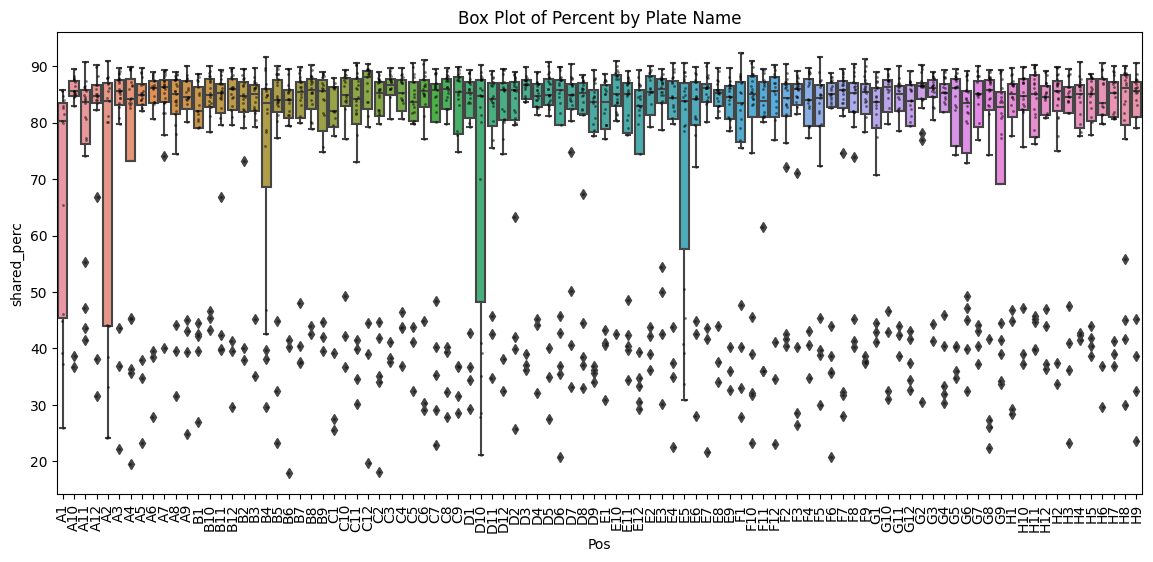

In [32]:
# sort data
mrg = mrg.sort_values(by='Pos').reset_index(drop=True)

# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Pos', y='shared_perc', data=mrg)
sns.stripplot(x='Pos', y='shared_perc', data=mrg, color='black', alpha=0.5, jitter=True, size=2)
plt.xticks(rotation=90)
plt.title('Box Plot of Percent by Plate Name')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of shared_perc vs Conc (ng/ul)')

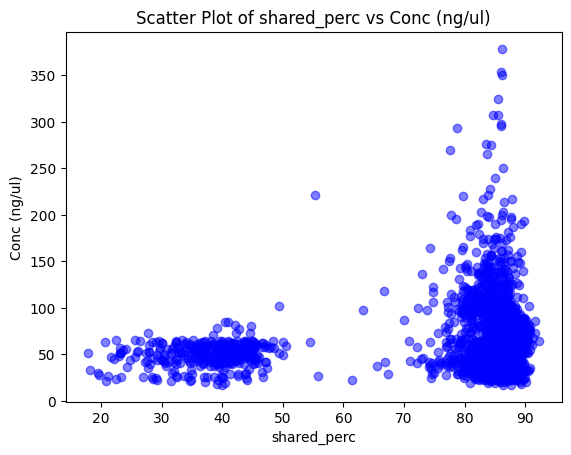

In [35]:
plt.scatter(mrg['shared_perc'], mrg['Conc (ng/ul)'], alpha=0.5, color='blue')
plt.xlabel('shared_perc')
plt.ylabel('Conc (ng/ul)')
plt.title('Scatter Plot of shared_perc vs Conc (ng/ul)')

In [26]:
# Post-Hoc Test (Tukey's HSD)
posthoc = pairwise_tukeyhsd(mrg['shared_perc'], mrg['Plate'], alpha=0.05)
df = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])
df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,MBbgi-01,MBbgi-02,6.7297,0.7324,-3.2797,16.7391,False
1,MBbgi-01,MBbgi-03,0.8423,1.0000,-8.4998,10.1843,False
2,MBbgi-01,MBbgi-04,-0.1575,1.0000,-9.5483,9.2333,False
3,MBbgi-01,MBbgi-05,0.2613,1.0000,-9.6212,10.1438,False
4,MBbgi-01,MBbgi-06,3.4453,0.9999,-6.0344,12.9250,False
...,...,...,...,...,...,...,...
320,MBbgi-23,MBbgi-25,-0.8819,1.0000,-7.8038,6.0399,False
321,MBbgi-23,MBbgi-26,-2.1231,1.0000,-12.8797,8.6334,False
322,MBbgi-24,MBbgi-25,-0.3489,1.0000,-7.3702,6.6723,False
323,MBbgi-24,MBbgi-26,-1.5901,1.0000,-12.4109,9.2306,False


MBbgi-01 has significant differences with MBbgi-07, MBbgi-13, MBbgi-14, MBbgi-15, MBbgi-17, MBbgi-18, MBbgi-19, and MBbgi-20.
MBbgi-07 shows significant differences with many other groups (e.g., MBbgi-08 to MBbgi-26).
MBbgi-13, MBbgi-14, MBbgi-15, MBbgi-17, MBbgi-18, MBbgi-19, and MBbgi-20 frequently exhibit significant differences when compared to other groups.

In [28]:
# Find groups with significantly smaller percentages
# A positive "meandiff" indicates that the mean of group2 is higher than the mean of group1.
smaller_groups = df[(df['reject'] == True) & (df['meandiff'] > 0)]
smaller_groups['group1'].unique()


array(['MBbgi-01', 'MBbgi-03', 'MBbgi-04', 'MBbgi-05', 'MBbgi-06',
       'MBbgi-07', 'MBbgi-08', 'MBbgi-10', 'MBbgi-11', 'MBbgi-14',
       'MBbgi-15', 'MBbgi-16'], dtype=object)

In [29]:
# Find groups with significantly higher percentages
# A positive "meandiff" indicates that the mean of group2 is smaller than the mean of group1.
smaller_groups = df[(df['reject'] == True) & (df['meandiff'] < 0)]
smaller_groups['group1'].unique()

array(['MBbgi-01', 'MBbgi-02', 'MBbgi-03', 'MBbgi-04', 'MBbgi-05',
       'MBbgi-06', 'MBbgi-08', 'MBbgi-09', 'MBbgi-10', 'MBbgi-11',
       'MBbgi-12', 'MBbgi-13'], dtype=object)